In [4]:
import berserk;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;

In [5]:
f = open("lichess.txt", "r")
token = (f.read())
token = token.strip()
session = berserk.TokenSession(token)
client = berserk.Client (session=session)

In [6]:
client.account.get()

{'id': 'brechner',
 'username': 'Brechner',
 'perfs': {'blitz': {'games': 1543, 'rating': 1563, 'rd': 49, 'prog': -9},
  'puzzle': {'games': 3, 'rating': 1647, 'rd': 310, 'prog': 0, 'prov': True},
  'bullet': {'games': 9, 'rating': 1223, 'rd': 154, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'classical': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 0, 'rating': 1500, 'rd': 500, 'prog': 0, 'prov': True}},
 'createdAt': datetime.datetime(2019, 1, 20, 11, 46, 42, 448000, tzinfo=datetime.timezone.utc),
 'seenAt': datetime.datetime(2022, 11, 1, 19, 8, 47, 976000, tzinfo=datetime.timezone.utc),
 'playTime': {'total': 344096, 'tv': 0},
 'url': 'https://lichess.org/@/Brechner',
 'count': {'all': 1553,
  'rated': 1552,
  'ai': 0,
  'draw': 68,
  'drawH': 68,
  'loss': 750,
  'lossH': 750,
  'win': 735,
  'winH': 735,
  'bookmark': 0,
  'playing': 0,
  'import':

In [7]:
brechner_data = client.users.get_rating_history('Brechner')
brechner_data

[{'name': 'Bullet',
  'points': [Entry(year=2019, month=0, day=28, rating=1319),
   Entry(year=2021, month=6, day=31, rating=1174),
   Entry(year=2021, month=7, day=14, rating=1218),
   Entry(year=2021, month=8, day=1, rating=1219),
   Entry(year=2021, month=8, day=2, rating=1223)]},
 {'name': 'Blitz',
  'points': [Entry(year=2021, month=6, day=28, rating=1210),
   Entry(year=2021, month=6, day=29, rating=1454),
   Entry(year=2021, month=6, day=30, rating=1572),
   Entry(year=2021, month=6, day=31, rating=1556),
   Entry(year=2021, month=7, day=1, rating=1614),
   Entry(year=2021, month=7, day=2, rating=1613),
   Entry(year=2021, month=7, day=3, rating=1627),
   Entry(year=2021, month=7, day=4, rating=1649),
   Entry(year=2021, month=7, day=6, rating=1692),
   Entry(year=2021, month=7, day=7, rating=1683),
   Entry(year=2021, month=7, day=14, rating=1661),
   Entry(year=2021, month=7, day=15, rating=1660),
   Entry(year=2021, month=7, day=16, rating=1620),
   Entry(year=2021, month=7, 

In [8]:
brechner_data = client.users.get_rating_history('Brechner')
df = pd.DataFrame(brechner_data[1])
df.head()

,name,points
0,Blitz,"(2021, 6, 28, 1210)"
1,Blitz,"(2021, 6, 29, 1454)"
2,Blitz,"(2021, 6, 30, 1572)"
3,Blitz,"(2021, 6, 31, 1556)"
4,Blitz,"(2021, 7, 1, 1614)"


In [9]:
df.get(["points"])


,points
0,"(2021, 6, 28, 1210)"
1,"(2021, 6, 29, 1454)"
2,"(2021, 6, 30, 1572)"
3,"(2021, 6, 31, 1556)"
4,"(2021, 7, 1, 1614)"
...,...
339,"(2022, 9, 22, 1571)"
340,"(2022, 9, 23, 1564)"
341,"(2022, 9, 27, 1557)"
342,"(2022, 9, 30, 1556)"


In [10]:
chess_data = pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])
chess_data

,year,month,day,rating
0,2021,6,28,1210
1,2021,6,29,1454
2,2021,6,30,1572
3,2021,6,31,1556
4,2021,7,1,1614
...,...,...,...,...
339,2022,9,22,1571
340,2022,9,23,1564
341,2022,9,27,1557
342,2022,9,30,1556


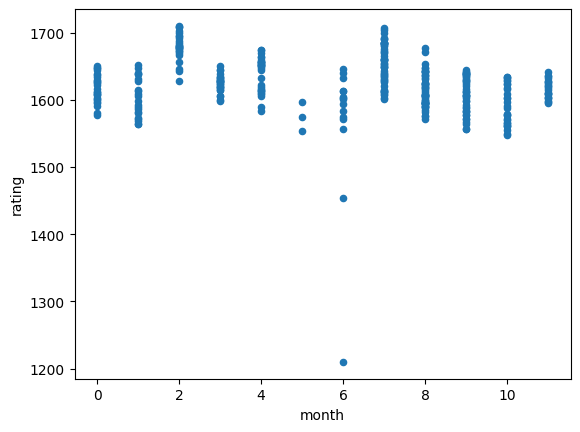

In [11]:
chess_data.plot(kind = 'scatter', x = 'month', y = 'rating')

plt.show()

In [12]:
chess_data.describe()

,year,month,day,rating
count,344.000000,344.000000,344.000000,344.000000
mean,2021.613372,5.985465,15.825581,1622.308140
std,0.487687,3.372383,9.035004,41.845103
min,2021.000000,0.000000,1.000000,1210.000000
25%,2021.000000,3.000000,8.000000,1600.750000
50%,2022.000000,7.000000,16.000000,1623.000000
75%,2022.000000,9.000000,24.000000,1644.250000
max,2022.000000,11.000000,31.000000,1710.000000


In [13]:
new_array = np.array(chess_data)
new_array

array([[2021,    6,   28, 1210],
       [2021,    6,   29, 1454],
       [2021,    6,   30, 1572],
       ...,
       [2022,    9,   27, 1557],
       [2022,    9,   30, 1556],
       [2022,   10,    1, 1563]])

In [14]:
year = chess_data.groupby('year');
year.first()

,month,day,rating
year,,,
2021,6,28,1210
2022,0,2,1608


In [15]:
year_month = chess_data.groupby(['year', 'month']);
year_month.first()

day  rating
year month             
2021 6       28    1210
     7        1    1614
     8        1    1591
     9        1    1571
     10       1    1588
     11       2    1628
2022 0        2    1608
     1        1    1572
     2        1    1695
     3        1    1626
     4        1    1653
     5        1    1597
     6        9    1575
     7        1    1661
     8        2    1677
     9        1    1623
     10       1    1563

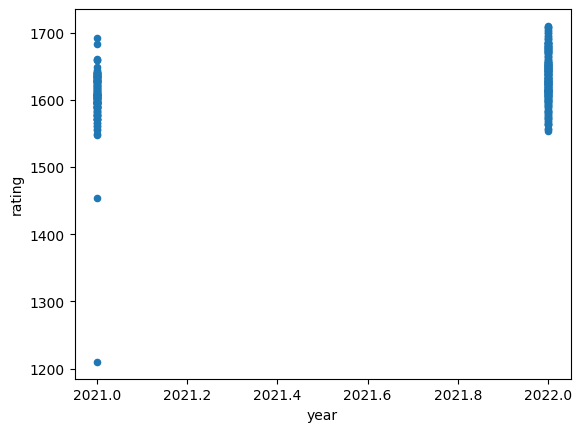

In [16]:
chess_data.groupby(['rating']).mean()
chess_data.plot.scatter( x= 'year', y = 'rating' );

In [17]:
chess_data_copy = chess_data.copy()

In [18]:
chess_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    344 non-null    int64
 1   month   344 non-null    int64
 2   day     344 non-null    int64
 3   rating  344 non-null    int64
dtypes: int64(4)
memory usage: 10.9 KB


In [19]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [20]:
chess_data.rating.mean()

1622.3081395348838